In [1]:
import joblib, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
my_package = "C:\\Users\\welcome\\Desktop\\MyFuncs"
imp_mods = joblib.os.sys.path

if my_package not in imp_mods:
    imp_mods.append(my_package)
    print("Package imported successfully!")

Package imported successfully!


In [3]:
import myio_funcs as mf

In [4]:
pth = 'W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets'
transdf_loc = '{}\\KPMG-all-transactions-dataframe.joblib'.format(pth)
custsdf_loc = f"{pth}\\KPMG-existing-customers-dataframe.joblib"
new_custsdf_loc = f"{pth}\\KPMG-new-customer-list-dataframe.joblib"
cust_transdf_loc = f"{pth}\\KPMG-living-customers-transactions.joblib"

In [5]:
sf = mf.file_search(pth, 'KPMG', 'joblib')
sf.keys()

dict_keys(['KPMG-all-transactions-dataframe.joblib', 'KPMG-existing-customers-dataframe.joblib', 'KPMG-living-customers-transactions.joblib', 'KPMG-new-customer-list-dataframe.joblib'])

## CLEANING & PREPROCESSING OF DATAFRAMES

### 4. MISSING DATA

In [6]:
import ds_funcs as dsf

#### Living customers transactions dataframe

In [7]:
cust_trans = joblib.load(cust_transdf_loc)
cust_trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,1,2,2950,2017-02-25,False,Solex,Standard,medium,medium,71.49,...,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10,984 Hoepker Court,3064,Victoria,6
1,2,3,3120,2017-05-21,True,Trek Bicycles,Standard,medium,large,2091.47,...,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10,4 Shopko Circle,2196,New South Wales,5
2,3,37,402,2017-10-16,False,OHM Cycles,Standard,low,medium,1793.43,...,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,No,22,586 Miller Parkway,2835,New South Wales,1
3,4,88,3135,2017-08-31,False,Norco Bicycles,Standard,medium,medium,1198.46,...,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,16,1617 Harper Parkway,2096,New South Wales,10
4,5,78,787,2017-10-01,True,Giant Bicycles,Standard,medium,large,1765.30,...,1996-12-15,NaN,Retail,Affluent Customer,Yes,2,0601 Stephen Place,2292,New South Wales,7


In [8]:
dsf.percentage_missing_data(cust_trans)

Number of missing rows:


job_industry_category      3206
job_title                  2379
last_name                   635
DOB                         444
tenure                      444
online_order                354
brand                       196
product_line                196
product_class               196
product_size                196
standard_cost               196
product_first_sold_date     196
address                      28
postcode                     28
state                        28
property_valuation           28
dtype: int64

In [9]:
missing = dsf.percentage_missing_data(cust_trans)
mp = dsf.percentage_missing_data(cust_trans, in_percentage=True)

Number of missing rows:
Percentage number of missing rows:


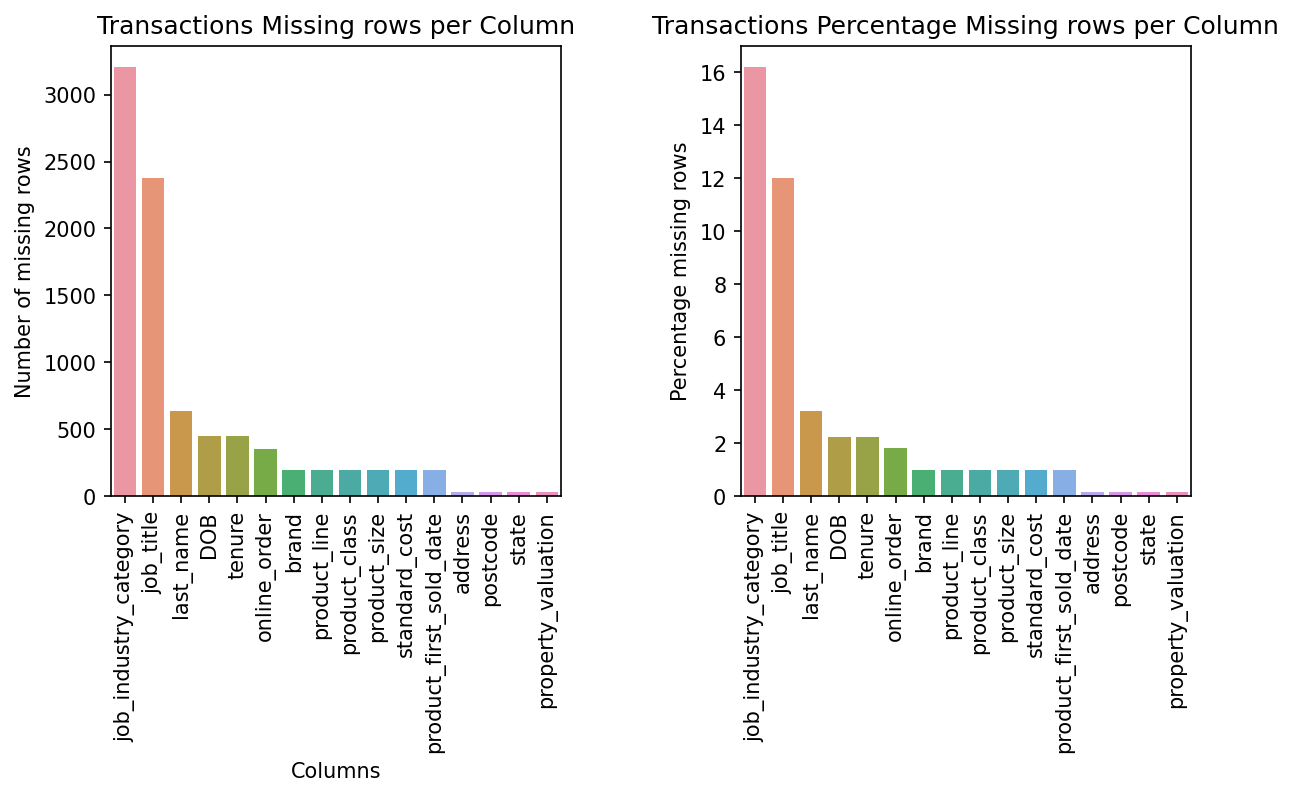

In [10]:
fig = plt.figure(figsize=(6, 3), dpi=150)
l, r = fig.add_axes(rect=[0, 0, .5, 1]), fig.add_axes(rect=[.7, 0, .5, 1])

sns.barplot(x=missing.index, y=missing, ax=l)
sns.barplot(x=mp.index, y=mp, ax=r)

l.set_xticklabels(labels=missing.index, rotation=90)
r.set_xticklabels(labels=mp.index, rotation=90)

l.set_xlabel("Columns"), l.set_ylabel("Number of missing rows")
r.set_ylabel("Percentage missing rows")
l.set_title("Transactions Missing rows per Column"), r.set_title("Transactions Percentage Missing rows per Column");

Percentage number of missing rows:


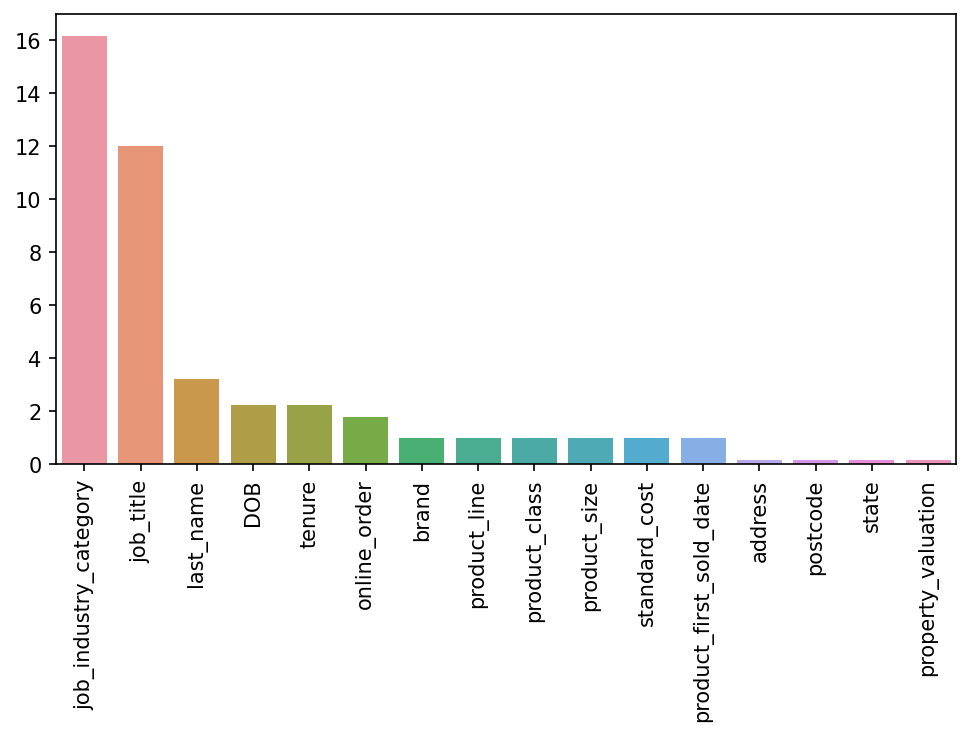

In [11]:
missing = dsf.percentage_missing_data(cust_trans, in_percentage=True, draw_graph=True)

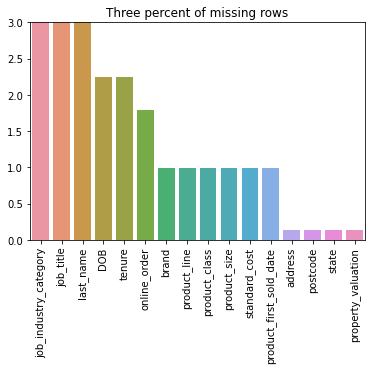

In [12]:
sns.barplot(x=missing.index, y=missing)
plt.ylim(bottom=0, top=3), plt.xticks(rotation=90)
plt.title("Three percent of missing rows");

## DEALING WITH MISSING DATA

#### Drop all missing rows <= 1 % of data

In [13]:
print(len(missing[missing <= 1].index))
print(missing[missing <= 1].index)

10
Index(['brand', 'product_line', 'product_class', 'product_size',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'property_valuation'],
      dtype='object')


In [14]:
cust_trans.loc[cust_trans['state'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
116,118,20,22,2017-03-21,False,Trek Bicycles,Standard,medium,small,1775.81,...,1962-12-10,NaN,IT,Mass Customer,No,11,NaN,NaN,NaN,NaN
3448,3480,32,22,2017-09-18,False,Giant Bicycles,Standard,medium,medium,642.70,...,1962-12-10,NaN,IT,Mass Customer,No,11,NaN,NaN,NaN,NaN
3472,3504,38,22,2017-07-16,True,Solex,Standard,medium,medium,1577.53,...,1962-12-10,NaN,IT,Mass Customer,No,11,NaN,NaN,NaN,NaN
4521,4565,5,10,2017-08-26,False,Trek Bicycles,Mountain,low,medium,574.64,...,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20,NaN,NaN,NaN,NaN
4556,4601,65,22,2017-05-29,True,WeareA2B,Standard,medium,medium,1807.45,...,1962-12-10,NaN,IT,Mass Customer,No,11,NaN,NaN,NaN,NaN
5538,5598,85,23,2017-12-20,False,WeareA2B,Standard,medium,medium,1228.07,...,1995-02-10,NaN,NaN,High Net Worth,Yes,1,NaN,NaN,NaN,NaN
5890,5956,21,10,2017-06-20,True,Solex,Standard,medium,large,1071.23,...,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,Yes,20,NaN,NaN,NaN,NaN
7349,7429,54,23,2017-10-06,False,WeareA2B,Standard,medium,medium,1807.45,...,1995-02-10,NaN,NaN,High Net Worth,Yes,1,NaN,NaN,NaN,NaN
7614,7695,0,23,2017-04-02,True,NaN,NaN,NaN,NaN,2037.77,...,1995-02-10,NaN,NaN,High Net Worth,Yes,1,NaN,NaN,NaN,NaN
7866,7951,19,23,2017-08-03,True,Trek Bicycles,Mountain,low,medium,574.64,...,1995-02-10,NaN,NaN,High Net Worth,Yes,1,NaN,NaN,NaN,NaN


In [15]:
cust_trans = cust_trans.loc[cust_trans['state'].notnull()]
cust_trans

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
0,1,2,2950,2017-02-25,False,Solex,Standard,medium,medium,71.49,...,1955-01-11,Software Engineer I,Financial Services,Mass Customer,Yes,10,984 Hoepker Court,3064,Victoria,6
1,2,3,3120,2017-05-21,True,Trek Bicycles,Standard,medium,large,2091.47,...,1979-02-04,Clinical Specialist,Health,Mass Customer,Yes,10,4 Shopko Circle,2196,New South Wales,5
2,3,37,402,2017-10-16,False,OHM Cycles,Standard,low,medium,1793.43,...,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,No,22,586 Miller Parkway,2835,New South Wales,1
3,4,88,3135,2017-08-31,False,Norco Bicycles,Standard,medium,medium,1198.46,...,1962-01-14,Staff Scientist,Financial Services,Mass Customer,No,16,1617 Harper Parkway,2096,New South Wales,10
4,5,78,787,2017-10-01,True,Giant Bicycles,Standard,medium,large,1765.30,...,1996-12-15,NaN,Retail,Affluent Customer,Yes,2,0601 Stephen Place,2292,New South Wales,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,19996,51,1018,2017-06-24,True,OHM Cycles,Standard,high,medium,2005.66,...,1994-11-27,Help Desk Operator,Manufacturing,Mass Customer,Yes,7,3 Hayes Court,3109,Victoria,10
19806,19997,41,127,2017-11-09,True,Solex,Road,medium,medium,416.98,...,1974-12-03,Compensation Analyst,Financial Services,Mass Customer,No,19,0 Pearson Crossing,4405,Queensland,1
19807,19998,87,2284,2017-04-14,True,OHM Cycles,Standard,medium,medium,1636.90,...,1974-02-16,Staff Accountant IV,Telecommunications,High Net Worth,No,14,10055 Old Shore Lane,3630,Victoria,1
19808,19999,6,2764,2017-07-03,False,OHM Cycles,Standard,high,medium,227.88,...,1955-03-29,NaN,Financial Services,Mass Customer,Yes,20,1 Wayridge Park,4301,Queensland,1


#### Checking

Percentage number of missing rows:


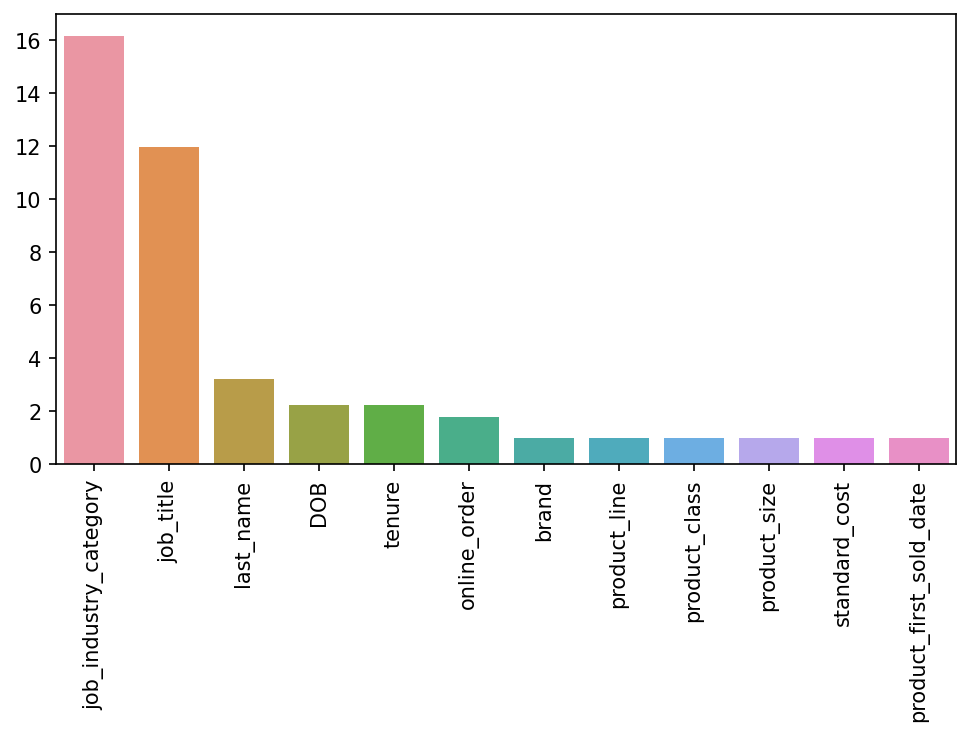

In [16]:
missing = dsf.percentage_missing_data(cust_trans, True, True)

#### Standard_cost

In [17]:
na_stdcost = cust_trans.loc[cust_trans['standard_cost'].isnull(), ['transaction_date', 'online_order', 'product_id', 'brand', 'product_line', 'product_class', 'product_size', 'product_first_sold_date', 'list_price', 'standard_cost']]

In [18]:
na_stdcost

,transaction_date,online_order,product_id,brand,product_line,product_class,product_size,product_first_sold_date,list_price,standard_cost
135,2017-09-23,False,0,NaN,NaN,NaN,NaN,NaT,1942.61,NaN
157,2017-08-27,False,0,NaN,NaN,NaN,NaN,NaT,1656.86,NaN
362,2017-03-10,False,0,NaN,NaN,NaN,NaN,NaT,850.89,NaN
402,2017-06-14,True,0,NaN,NaN,NaN,NaN,NaT,710.59,NaN
670,2017-07-02,False,0,NaN,NaN,NaN,NaN,NaT,1972.01,NaN
...,...,...,...,...,...,...,...,...,...,...
19156,2017-12-26,True,0,NaN,NaN,NaN,NaN,NaT,744.54,NaN
19199,2017-06-11,False,0,NaN,NaN,NaN,NaN,NaT,1098.18,NaN
19606,2017-01-13,False,0,NaN,NaN,NaN,NaN,NaT,868.56,NaN
19671,2017-06-24,True,0,NaN,NaN,NaN,NaN,NaT,1497.43,NaN


<b>NOTE:</b><br>
    Index containing null values of the standard_cost column also carries null values of all other features<br>
    Hence, <b>removing null values of the standard_cost column would also eliminate alot of the null values of other columns:</b><br>
    like product_first_sold_date, product_size, etc.

In [19]:
# select index of rows where standard cost is unknown
drop_index = cust_trans.loc[cust_trans['standard_cost'].isnull()].index
# drop rows where standard cost is unknown
cust_trans = cust_trans.drop(labels=drop_index, axis=0)

In [20]:
missing_perc = dsf.percentage_missing_data(cust_trans, in_percentage=True)
missing_cols = missing_perc.index
missing_perc

Percentage number of missing rows:


job_industry_category    16.18
job_title                11.93
last_name                 3.22
DOB                       2.23
tenure                    2.23
online_order              1.79
dtype: float64

#### Online_order

In [21]:
cust_trans['online_order'].value_counts()

True     9629
False    9608
Name: online_order, dtype: int64

#### Replacing online_order null values with None

In [22]:
cust_trans['online_order'] = cust_trans['online_order'].fillna(value='None')
cust_trans['online_order'].value_counts()

True     9629
False    9608
None      351
Name: online_order, dtype: int64

In [23]:
missing = dsf.percentage_missing_data(cust_trans)
missing_cols = missing.index
missing

Number of missing rows:


job_industry_category    3169
job_title                2336
last_name                 631
DOB                       436
tenure                    436
dtype: int64

#### Job_industry_category

In [24]:
cust_trans['job_industry_category'].value_counts()

Manufacturing         3932
Financial Services    3806
Health                3032
Retail                1737
Property              1263
IT                    1053
Entertainment          685
Argiculture            561
Telecommunications     350
Name: job_industry_category, dtype: int64

#### Replace job_industry_category null values with top job_industry_category per wealth_segment

In [26]:
# job_category per wealth segment
clss = cust_trans[['wealth_segment', 'job_industry_category']].value_counts()
clss = clss.reset_index()
clss.iloc[:10]

,wealth_segment,job_industry_category,0
0,Mass Customer,Manufacturing,1989
1,Mass Customer,Financial Services,1850
2,Mass Customer,Health,1572
3,Affluent Customer,Manufacturing,1078
4,High Net Worth,Financial Services,991
5,Affluent Customer,Financial Services,965
6,High Net Worth,Manufacturing,865
7,Mass Customer,Retail,864
8,High Net Worth,Health,765
9,Affluent Customer,Health,695


In [27]:
clss.columns = clss.columns.astype(np.str_).str.replace('0', 'count')
clss

,wealth_segment,job_industry_category,count
0,Mass Customer,Manufacturing,1989
1,Mass Customer,Financial Services,1850
2,Mass Customer,Health,1572
3,Affluent Customer,Manufacturing,1078
4,High Net Worth,Financial Services,991
5,Affluent Customer,Financial Services,965
6,High Net Worth,Manufacturing,865
7,Mass Customer,Retail,864
8,High Net Worth,Health,765
9,Affluent Customer,Health,695


In [28]:
# select only the highest-occurring job_industry_category per wealth_segment
result = clss.drop_duplicates(subset=['wealth_segment'])
result

,wealth_segment,job_industry_category,count
0,Mass Customer,Manufacturing,1989
3,Affluent Customer,Manufacturing,1078
4,High Net Worth,Financial Services,991


In [29]:
na_jobindcat = cust_trans.loc[cust_trans['job_industry_category'].isnull(), ['wealth_segment', 'job_industry_category']]
na_jobindcat

,wealth_segment,job_industry_category
24,Mass Customer,NaN
25,Affluent Customer,NaN
41,High Net Worth,NaN
43,Affluent Customer,NaN
50,High Net Worth,NaN
...,...,...
19788,Mass Customer,NaN
19791,Mass Customer,NaN
19793,Mass Customer,NaN
19802,Affluent Customer,NaN


In [30]:
# join null job_industry_category to the result df at 'wealth_segment'
# note that the number of rows is equal to number of null values
# present in the origingal dataframe
df = pd.merge(na_jobindcat, result.drop(columns=['count']), how='left', 
              on='wealth_segment').drop(labels=['job_industry_category_x'], axis=1)
df.columns = df.columns.str.replace('_y', '')

In [31]:
# rename merged dataframe's index to match those of null values
df.index = na_jobindcat.index
df

,wealth_segment,job_industry_category
24,Mass Customer,Manufacturing
25,Affluent Customer,Manufacturing
41,High Net Worth,Financial Services
43,Affluent Customer,Manufacturing
50,High Net Worth,Financial Services
...,...,...
19788,Mass Customer,Manufacturing
19791,Mass Customer,Manufacturing
19793,Mass Customer,Manufacturing
19802,Affluent Customer,Manufacturing


In [32]:
# checking
df[df['wealth_segment'] == 'High Net Worth'].iloc[:5]

,wealth_segment,job_industry_category
41,High Net Worth,Financial Services
50,High Net Worth,Financial Services
81,High Net Worth,Financial Services
98,High Net Worth,Financial Services
99,High Net Worth,Financial Services


In [33]:
# replace job_industry_category null values with top job_industry_category per wealth_segment
cust_trans.loc[cust_trans.index.isin(df.index), 'job_industry_category'] = df['job_industry_category']

In [34]:
cust_trans.loc[(cust_trans.index.isin(df.index) ) & (cust_trans['wealth_segment'] == 'High Net Worth')].head()

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation
41,42,79,3398,2017-05-14,False,Solex,Touring,medium,large,2083.94,...,1971-07-01,NaN,Financial Services,High Net Worth,Yes,7,375 Luster Parkway,2147,New South Wales,9
50,52,96,857,2017-11-27,False,Giant Bicycles,Standard,medium,large,1635.30,...,1964-08-14,General Manager,Financial Services,High Net Worth,No,4,18 Parkside Plaza,4122,Queensland,4
81,83,0,3398,2017-04-01,True,OHM Cycles,Standard,medium,medium,235.63,...,1971-07-01,NaN,Financial Services,High Net Worth,Yes,7,375 Luster Parkway,2147,New South Wales,9
98,100,0,119,2017-07-31,False,Solex,Standard,medium,medium,478.16,...,1981-12-04,Associate Professor,Financial Services,High Net Worth,Yes,9,5814 Bunker Hill Street,3070,Victoria,7
99,101,18,2347,2017-07-27,False,Norco Bicycles,Standard,high,medium,1148.64,...,1957-03-04,Programmer Analyst I,Financial Services,High Net Worth,No,11,1081 Laurel Park,2049,New South Wales,12


In [35]:
dsf.percentage_missing_data(cust_trans)

Number of missing rows:


job_title    2336
last_name     631
DOB           436
tenure        436
dtype: int64

In [36]:
# cust_trans[(cust_trans['product_id'] == 0) & (cust_trans['brand'].isnull())]

#### Job_title

In [37]:
cust_trans['job_title'].value_counts()

Social Worker                           225
Legal Assistant                         219
Business Systems Development Analyst    219
Assistant Professor                     208
Executive Secretary                     203
                                       ... 
Administrative Assistant I               15
Health Coach III                         14
Geologist II                             11
Research Assistant III                    9
Developer I                               7
Name: job_title, Length: 195, dtype: int64

##### Replace null values of job_title with highest-occurring job_titles per job_industry_category

In [39]:
na_jobtitle = cust_trans.loc[cust_trans['job_title'].isnull(), ['job_industry_category', 'job_title']]
na_jobtitle.head()

,job_industry_category,job_title
4,Retail,NaN
10,Retail,NaN
16,IT,NaN
30,Property,NaN
32,Manufacturing,NaN


In [40]:
clss = pd.DataFrame(cust_trans[['job_industry_category', 'job_title']].value_counts()).reset_index()
clss.head()

,job_industry_category,job_title,0
0,Health,Social Worker,225
1,Manufacturing,Nuclear Power Engineer,198
2,Manufacturing,Chemical Engineer,192
3,Health,Research Nurse,189
4,Health,Clinical Specialist,182


In [41]:
clss.columns = clss.columns.astype(np.str_).str.replace('0', 'count')
clss.head()

,job_industry_category,job_title,count
0,Health,Social Worker,225
1,Manufacturing,Nuclear Power Engineer,198
2,Manufacturing,Chemical Engineer,192
3,Health,Research Nurse,189
4,Health,Clinical Specialist,182


In [42]:
# retain only the highest-occurring job_title per job_industry_category
result = clss.drop_duplicates(subset=['job_industry_category'])
result

,job_industry_category,job_title,count
0,Health,Social Worker,225
1,Manufacturing,Nuclear Power Engineer,198
5,Entertainment,Assistant Media Planner,178
9,Financial Services,Senior Financial Analyst,158
11,Retail,Sales Representative,153
105,IT,Business Systems Development Analyst,37
108,Property,Internal Auditor,36
172,Telecommunications,Tax Accountant,25
197,Argiculture,Executive Secretary,23


In [43]:
df = pd.merge(na_jobtitle, result.drop(columns='count'), how='left', on='job_industry_category')
df

,job_industry_category,job_title_x,job_title_y
0,Retail,NaN,Sales Representative
1,Retail,NaN,Sales Representative
2,IT,NaN,Business Systems Development Analyst
3,Property,NaN,Internal Auditor
4,Manufacturing,NaN,Nuclear Power Engineer
...,...,...,...
2331,Manufacturing,NaN,Nuclear Power Engineer
2332,Financial Services,NaN,Senior Financial Analyst
2333,Manufacturing,NaN,Nuclear Power Engineer
2334,Manufacturing,NaN,Nuclear Power Engineer


In [44]:
df = df.drop(columns='job_title_x')
df.columns = df.columns.str.replace('_y', '')
df

,job_industry_category,job_title
0,Retail,Sales Representative
1,Retail,Sales Representative
2,IT,Business Systems Development Analyst
3,Property,Internal Auditor
4,Manufacturing,Nuclear Power Engineer
...,...,...
2331,Manufacturing,Nuclear Power Engineer
2332,Financial Services,Senior Financial Analyst
2333,Manufacturing,Nuclear Power Engineer
2334,Manufacturing,Nuclear Power Engineer


In [45]:
# rename merged dataframe's index to match those of null values
df.index = na_jobtitle.index
df

,job_industry_category,job_title
4,Retail,Sales Representative
10,Retail,Sales Representative
16,IT,Business Systems Development Analyst
30,Property,Internal Auditor
32,Manufacturing,Nuclear Power Engineer
...,...,...
19791,Manufacturing,Nuclear Power Engineer
19796,Financial Services,Senior Financial Analyst
19799,Manufacturing,Nuclear Power Engineer
19801,Manufacturing,Nuclear Power Engineer


In [46]:
# replace job_title null values at index
cust_trans.loc[cust_trans['job_title'].index.isin(df.index), ['job_title']] = df['job_title']
cust_trans.loc[cust_trans['job_title'].index.isin(df.index), ['job_industry_category', 'customer_id', 'job_title']]

,job_industry_category,customer_id,job_title
4,Retail,787,Sales Representative
10,Retail,1986,Sales Representative
16,IT,2426,Business Systems Development Analyst
30,Property,2810,Internal Auditor
32,Manufacturing,1272,Nuclear Power Engineer
...,...,...,...
19791,Manufacturing,3304,Nuclear Power Engineer
19796,Financial Services,2918,Senior Financial Analyst
19799,Manufacturing,714,Nuclear Power Engineer
19801,Manufacturing,1374,Nuclear Power Engineer


In [47]:
cust_trans[cust_trans['job_title'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation


In [48]:
dsf.percentage_missing_data(cust_trans)

Number of missing rows:


last_name    631
DOB          436
tenure       436
dtype: int64

#### Last_name

In [51]:
na_lastname = cust_trans.loc[cust_trans['last_name'].isnull()]

In [53]:
na_lastname[['first_name', 'last_name']]

,first_name,last_name
44,Susie,NaN
45,Vernor,NaN
50,Theo,NaN
74,Jarret,NaN
95,Beitris,NaN
...,...,...
19717,Linea,NaN
19756,Hoyt,NaN
19780,Cristie,NaN
19794,Dud,NaN


#### Replace null values of last_name with 'Unknown'

In [54]:
cust_trans['last_name'] = cust_trans['last_name'].fillna('Unknown')
cust_trans.loc[cust_trans.index.isin(na_lastname.index), 'last_name']

44       Unknown
45       Unknown
50       Unknown
74       Unknown
95       Unknown
          ...   
19717    Unknown
19756    Unknown
19780    Unknown
19794    Unknown
19796    Unknown
Name: last_name, Length: 631, dtype: object

In [55]:
dsf.percentage_missing_data(cust_trans)

Number of missing rows:


DOB       436
tenure    436
dtype: int64

#### Date_of_birth (DOB)

In [ ]:
cust_trans.loc[cust_trans['DOB'].isnull()]

#### Create an 'age' feature from DOB

In [60]:
cust_trans.loc[cust_trans['DOB'].notnull(), 'age'] = dsf.calc_age_from_dob(cust_trans.loc[cust_trans['DOB'].notnull(), 'DOB'])
cust_trans['age']

2021-08-15
0       24323 days
1       15533 days
2       16144 days
3       21763 days
4        9009 days
           ...    
19805    9758 days
19806   17057 days
19807   17347 days
19808   24246 days
19809    9012 days
Name: DOB, Length: 19152, dtype: timedelta64[ns]


0        66.0
1        42.0
2        44.0
3        59.0
4        24.0
         ... 
19805    26.0
19806    46.0
19807    47.0
19808    66.0
19809    24.0
Name: age, Length: 19588, dtype: float64

In [61]:
cust_trans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'trans_week_day', 'trans_day_num',
       'trans_month_num', 'trans_month', 'trans_year', 'first_name',
       'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment', 'owns_car',
       'tenure', 'address', 'postcode', 'state', 'property_valuation', 'age'],
      dtype='object')

In [62]:
cust_trans = cust_trans[['customer_id', 'first_name', 'last_name', 'gender', 
                         'address', 'postcode', 'state', 'DOB', 'job_title', 
                         'job_industry_category', 'wealth_segment', 'owns_car', 
                         'tenure', 'age', 'property_valuation', 'past_3_years_bike_related_purchases', 
                         'transaction_id', 'product_id', 'transaction_date', 'online_order',
                         'brand', 'product_line', 'product_class', 'product_size', 'list_price', 
                         'standard_cost', 'product_first_sold_date', 'trans_week_day', 'trans_day_num', 
                         'trans_month_num', 'trans_month', 'trans_year']]

In [63]:
dsf.percentage_missing_data(cust_trans)

Number of missing rows:


DOB       436
tenure    436
age       436
dtype: int64

#### Age

In [66]:
na_ages = cust_trans.loc[cust_trans['age'].isnull(), ['wealth_segment', 'job_title', 'age']]

In [68]:
na_ages

,wealth_segment,job_title,age
16,Affluent Customer,Business Systems Development Analyst,NaN
58,Mass Customer,Analog Circuit Design manager,NaN
62,High Net Worth,Assistant Professor,NaN
120,Mass Customer,Engineer I,NaN
171,Affluent Customer,Senior Developer,NaN
...,...,...,...
19397,Mass Customer,Senior Sales Associate,NaN
19480,Mass Customer,Automation Specialist IV,NaN
19491,Mass Customer,Programmer II,NaN
19643,Mass Customer,Programmer II,NaN


#### Replace the null ages with average age per wealth_segment and job_title

In [65]:
clss = cust_trans[['wealth_segment', 'job_title', 'age']].groupby(by=['wealth_segment', 'job_title']).mean().reset_index()
clss.head()

,wealth_segment,job_title,age
0,Affluent Customer,Account Coordinator,49.222222
1,Affluent Customer,Account Executive,37.093750
2,Affluent Customer,Account Representative I,33.222222
3,Affluent Customer,Account Representative III,28.000000
4,Affluent Customer,Account Representative IV,46.315789


In [69]:
clss['age'] = np.int64(clss['age'])
clss

,wealth_segment,job_title,age
0,Affluent Customer,Account Coordinator,49
1,Affluent Customer,Account Executive,37
2,Affluent Customer,Account Representative I,33
3,Affluent Customer,Account Representative III,28
4,Affluent Customer,Account Representative IV,46
...,...,...,...
537,Mass Customer,Web Designer III,36
538,Mass Customer,Web Designer IV,48
539,Mass Customer,Web Developer I,47
540,Mass Customer,Web Developer II,54


In [70]:
# highest-occurring age per wealth_segment, gender, job_title combo

In [72]:
# check for duplicate values of wealth_segment and job_title
clss.loc[clss[['wealth_segment', 'job_title']].duplicated()]

,wealth_segment,job_title,age


In [73]:
result = clss.drop_duplicates(subset=['wealth_segment', 'job_title'])
result

,wealth_segment,job_title,age
0,Affluent Customer,Account Coordinator,49
1,Affluent Customer,Account Executive,37
2,Affluent Customer,Account Representative I,33
3,Affluent Customer,Account Representative III,28
4,Affluent Customer,Account Representative IV,46
...,...,...,...
537,Mass Customer,Web Designer III,36
538,Mass Customer,Web Designer IV,48
539,Mass Customer,Web Developer I,47
540,Mass Customer,Web Developer II,54


In [74]:
result.loc[ (result['wealth_segment'] == 'Affluent Customer') & (result['job_title'] == 'Office Assistant IV')]

,wealth_segment,job_title,age
101,Affluent Customer,Office Assistant IV,30


In [75]:
result.loc[ (result['wealth_segment'] == 'Affluent Customer') & (result['job_title'] == 'Staff Accountant I')]

,wealth_segment,job_title,age


In [76]:
result.loc[ (result['wealth_segment'] == 'High Net Worth') & (result['job_title'] == 'Engineer III')]

,wealth_segment,job_title,age
238,High Net Worth,Engineer III,-2147483648


In [77]:
# merge alive dataframe with result dataframe at their corresponding wealth_segment and job_title
df = pd.merge(na_ages, result, how='left', on=['wealth_segment', 'job_title'])
df

,wealth_segment,job_title,age_x,age_y
0,Affluent Customer,Business Systems Development Analyst,NaN,42
1,Mass Customer,Analog Circuit Design manager,NaN,44
2,High Net Worth,Assistant Professor,NaN,39
3,Mass Customer,Engineer I,NaN,37
4,Affluent Customer,Senior Developer,NaN,41
...,...,...,...,...
431,Mass Customer,Senior Sales Associate,NaN,49
432,Mass Customer,Automation Specialist IV,NaN,42
433,Mass Customer,Programmer II,NaN,47
434,Mass Customer,Programmer II,NaN,47


In [78]:
df.shape

(436, 4)

In [79]:
# select only the rows containing the original null values
# and drop the original age column (containing null values)
df = df.drop('age_x', axis=1)
df.index = na_ages.index
df

,wealth_segment,job_title,age_y
16,Affluent Customer,Business Systems Development Analyst,42
58,Mass Customer,Analog Circuit Design manager,44
62,High Net Worth,Assistant Professor,39
120,Mass Customer,Engineer I,37
171,Affluent Customer,Senior Developer,41
...,...,...,...
19397,Mass Customer,Senior Sales Associate,49
19480,Mass Customer,Automation Specialist IV,42
19491,Mass Customer,Programmer II,47
19643,Mass Customer,Programmer II,47


In [80]:
# replace the old null values at each index with a corresponding age_y
cust_trans.loc[cust_trans.index.isin(df.index), 'age'] = df['age_y']

In [81]:
cust_trans.loc[cust_trans['age'].isin(df.index), ['wealth_segment', 'job_title', 'age']]

,wealth_segment,job_title,age
5,Affluent Customer,Web Designer II,62.0
35,Mass Customer,Safety Technician II,62.0
79,High Net Worth,Clinical Specialist,58.0
90,Mass Customer,Payment Adjustment Coordinator,62.0
138,High Net Worth,Physical Therapy Assistant,62.0
...,...,...,...
19709,Mass Customer,Nurse,58.0
19719,Mass Customer,Recruiting Manager,58.0
19744,Mass Customer,Administrative Assistant II,62.0
19772,Affluent Customer,Budget/Accounting Analyst II,58.0


#### Remove unrealistic ages (negative values)

In [82]:
dropper = cust_trans.loc[cust_trans['age'] < 18, ['wealth_segment', 'job_title', 'age', 'tenure']]
print(len(dropper))
dropper

17


,wealth_segment,job_title,age,tenure
1272,Affluent Customer,Staff Accountant II,-2.147484e+09,NaN
3209,High Net Worth,Office Assistant IV,-2.147484e+09,NaN
3365,High Net Worth,Engineer III,-2.147484e+09,NaN
4591,High Net Worth,Engineer III,-2.147484e+09,NaN
6514,High Net Worth,Office Assistant IV,-2.147484e+09,NaN
6757,High Net Worth,Engineer III,-2.147484e+09,NaN
7679,Affluent Customer,Staff Accountant II,-2.147484e+09,NaN
7943,High Net Worth,Engineer III,-2.147484e+09,NaN
8108,High Net Worth,Office Assistant IV,-2.147484e+09,NaN
11373,Affluent Customer,Staff Accountant II,-2.147484e+09,NaN


In [83]:
cust_trans = cust_trans.drop(labels=dropper.index, axis=0)

In [87]:
cust_trans['age'] = cust_trans['age'].astype(np.int64)

In [88]:
cust_trans['age'].head()

0    66
1    42
2    44
3    59
4    24
Name: age, dtype: int64

In [89]:
dsf.percentage_missing_data(cust_trans)

Number of missing rows:


DOB       419
tenure    419
dtype: int64

#### NOTE: Keep the DOB column since we are now using the Age feature

#### Tenure

In [90]:
cust_trans.loc[cust_trans['tenure'].isnull(), missing_cols]

,job_industry_category,job_title,last_name,DOB,tenure
16,IT,Business Systems Development Analyst,Ovett,NaT,NaN
58,IT,Analog Circuit Design manager,Alloway,NaT,NaN
62,IT,Assistant Professor,Rene,NaT,NaN
120,Manufacturing,Engineer I,Acome,NaT,NaN
171,IT,Senior Developer,Choffin,NaT,NaN
...,...,...,...,...,...
19397,IT,Senior Sales Associate,Kevane,NaT,NaN
19480,IT,Automation Specialist IV,Rzehorz,NaT,NaN
19491,IT,Programmer II,Sprigg,NaT,NaN
19643,IT,Programmer II,Sprigg,NaT,NaN


####  Replace tenure null values with highest-occurring tenure values per age and job_title

In [91]:
# null tenure values
na_tenure = cust_trans.loc[cust_trans['tenure'].isna(), ['job_title', 'age', 'tenure']]
na_tenure

,job_title,age,tenure
16,Business Systems Development Analyst,42,NaN
58,Analog Circuit Design manager,44,NaN
62,Assistant Professor,39,NaN
120,Engineer I,37,NaN
171,Senior Developer,41,NaN
...,...,...,...
19397,Senior Sales Associate,49,NaN
19480,Automation Specialist IV,42,NaN
19491,Programmer II,47,NaN
19643,Programmer II,47,NaN


In [92]:
# highest-occurring tenures per job_title, age
clss = cust_trans.loc[cust_trans['tenure'].notnull(), ['job_title', 'age', 'tenure']].value_counts().reset_index()
clss.columns = clss.columns.astype(np.str_).str.replace('0', 'count')
clss

,job_title,age,tenure,count
0,Senior Financial Analyst,43,17,26
1,Nuclear Power Engineer,41,4,22
2,Sales Representative,22,1,20
3,Nuclear Power Engineer,43,17,18
4,Business Systems Development Analyst,43,10,18
...,...,...,...,...
3305,GIS Technical Architect,25,7,1
3306,Structural Analysis Engineer,20,1,1
3307,Assistant Manager,34,17,1
3308,Help Desk Operator,61,6,1


In [93]:
# checking for presence of ['job_title', 'age'] combination duplicates
clss.loc[ (clss['job_title'] == 'Senior Financial Analyst') & (clss['age'] == 43) ]

,job_title,age,tenure,count
0,Senior Financial Analyst,43,17,26
428,Senior Financial Analyst,43,13,9
1541,Senior Financial Analyst,43,11,6
1763,Senior Financial Analyst,43,15,5


In [94]:
# remove duplicated job_title, age matches
result = clss.drop_duplicates(subset=['job_title', 'age'])
result

,job_title,age,tenure,count
0,Senior Financial Analyst,43,17,26
1,Nuclear Power Engineer,41,4,22
2,Sales Representative,22,1,20
3,Nuclear Power Engineer,43,17,18
4,Business Systems Development Analyst,43,10,18
...,...,...,...,...
3303,VP Product Management,33,20,1
3304,Accountant IV,50,4,1
3305,GIS Technical Architect,25,7,1
3306,Structural Analysis Engineer,20,1,1


In [95]:
# checking for job_title-age combo duplicates
# after selecting only the first occurrences (highest-occurring) of each combo
result.loc[ (result['job_title'] == 'Senior Financial Analyst') & (clss['age'] == 43) ]

,job_title,age,tenure,count
0,Senior Financial Analyst,43,17,26


In [96]:
result.loc[result['tenure'].isnull()]

,job_title,age,tenure,count


In [97]:
df = pd.merge(na_tenure, result.drop(columns='count'), on=['job_title', 'age'], how='left')
df

,job_title,age,tenure_x,tenure_y
0,Business Systems Development Analyst,42,NaN,10.0
1,Analog Circuit Design manager,44,NaN,18.0
2,Assistant Professor,39,NaN,NaN
3,Engineer I,37,NaN,NaN
4,Senior Developer,41,NaN,9.0
...,...,...,...,...
414,Senior Sales Associate,49,NaN,NaN
415,Automation Specialist IV,42,NaN,NaN
416,Programmer II,47,NaN,NaN
417,Programmer II,47,NaN,NaN


In [98]:
df.loc[ (df['job_title'] == 'Engineer III') & (df['age'] == 41)]

,job_title,age,tenure_x,tenure_y
28,Engineer III,41,NaN,NaN
65,Engineer III,41,NaN,NaN
79,Engineer III,41,NaN,NaN
209,Engineer III,41,NaN,NaN
327,Engineer III,41,NaN,NaN
402,Engineer III,41,NaN,NaN


In [99]:
cust_trans.loc[ (cust_trans['job_title'] == 'Engineer III') & (cust_trans['age'] == 41), ['job_title', 'age', 'tenure']]

,job_title,age,tenure
1113,Engineer III,41,NaN
2644,Engineer III,41,NaN
3375,Engineer III,41,NaN
10367,Engineer III,41,NaN
15938,Engineer III,41,NaN
19045,Engineer III,41,NaN


In [100]:
df = df.drop(labels='tenure_x', axis=1)
df.index = na_tenure.index
df

,job_title,age,tenure_y
16,Business Systems Development Analyst,42,10.0
58,Analog Circuit Design manager,44,18.0
62,Assistant Professor,39,NaN
120,Engineer I,37,NaN
171,Senior Developer,41,9.0
...,...,...,...
19397,Senior Sales Associate,49,NaN
19480,Automation Specialist IV,42,NaN
19491,Programmer II,47,NaN
19643,Programmer II,47,NaN


In [101]:
# check for lingering null values in tenure
lingering_null = df[df['tenure_y'].isnull()]
lingering_null

,job_title,age,tenure_y
62,Assistant Professor,39,NaN
120,Engineer I,37,NaN
188,Actuary,37,NaN
329,Teacher,36,NaN
375,Budget/Accounting Analyst I,47,NaN
...,...,...,...
19342,Food Chemist,38,NaN
19397,Senior Sales Associate,49,NaN
19480,Automation Specialist IV,42,NaN
19491,Programmer II,47,NaN


In [ ]:
# replace values, at null tenure index, with matching tenure_y
cust_trans.loc[cust_trans['tenure'].index.isin(df.index), 'tenure'] = df['tenure_y']

In [103]:
cust_trans.loc[cust_trans['tenure'].index.isin(df.index), ['tenure']]

,tenure
16,10.0
58,18.0
62,NaN
120,NaN
171,9.0
...,...
19397,NaN
19480,NaN
19491,NaN
19643,NaN


In [104]:
dsf.percentage_missing_data(cust_trans, True)

Percentage number of missing rows:


DOB       2.14
tenure    0.83
dtype: float64

In [105]:
# remove the 0.85% of null tenures still lingering
cust_trans = cust_trans.drop(labels=lingering_null.index, axis=0)

In [106]:
cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19409 entries, 0 to 19809
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19409 non-null  int64         
 1   first_name                           19409 non-null  object        
 2   last_name                            19409 non-null  object        
 3   gender                               19409 non-null  object        
 4   address                              19409 non-null  object        
 5   postcode                             19409 non-null  object        
 6   state                                19409 non-null  object        
 7   DOB                                  19152 non-null  datetime64[ns]
 8   job_title                            19409 non-null  object        
 9   job_industry_category                19409 non-null  object        
 10  wealth_seg

In [107]:
cust_trans.head()

,customer_id,first_name,last_name,gender,address,postcode,state,DOB,job_title,job_industry_category,...,product_class,product_size,list_price,standard_cost,product_first_sold_date,trans_week_day,trans_day_num,trans_month_num,trans_month,trans_year
0,2950,Kristos,Anthony,Male,984 Hoepker Court,3064,Victoria,1955-01-11,Software Engineer I,Financial Services,...,medium,medium,71.49,53.62,2012-12-02,Saturday,25,2,February,2017
1,3120,Lauree,O'Donnell,Female,4 Shopko Circle,2196,New South Wales,1979-02-04,Clinical Specialist,Health,...,medium,large,2091.47,388.92,2014-03-03,Sunday,21,5,May,2017
2,402,Berne,Donegan,Male,586 Miller Parkway,2835,New South Wales,1977-06-03,Desktop Support Technician,Retail,...,low,medium,1793.43,248.82,1999-07-20,Monday,16,10,October,2017
3,3135,Titus,Worsall,Male,1617 Harper Parkway,2096,New South Wales,1962-01-14,Staff Scientist,Financial Services,...,medium,medium,1198.46,381.1,1998-12-16,Thursday,31,8,August,2017
4,787,Norma,Batrim,Female,0601 Stephen Place,2292,New South Wales,1996-12-15,Sales Representative,Retail,...,medium,large,1765.30,709.48,2015-08-10,Sunday,1,10,October,2017


In [109]:
dsf.percentage_missing_data(cust_trans)

Number of missing rows:


DOB    257
dtype: int64

#### Save cleaned data to csv

In [110]:
sf = mf.file_search(pth, 'KPMG', 'csv')
sf.keys()

dict_keys(['cleaned-KPMG-cust-trans.csv', 'KPMG_VI_Customer_Address.csv', 'KPMG_VI_Customer_Demographic.csv', 'KPMG_VI_New_Customer_List.csv', 'KPMG_VI_Transactions (Oct-Nov-Dec).csv', 'KPMG_VI_Transactions.csv', 'KPMG_VI_Transactions2.csv'])

In [112]:
fpath = "{o}\\{f}".format(o='\\'.join(sf['KPMG_VI_Transactions.csv'].split('\\')[:-1]), f="\\cleaned-KPMG-cust-trans.csv")
print(fpath)

W:\Analyst & Business Skillset\Data analysis\Datasets\KPMG Raw Datasets\\cleaned-KPMG-cust-trans.csv


In [113]:
cust_trans.to_csv(fpath, index_label=False)

#### Save clean cust_trans dataframe to disk

In [114]:
joblib.dump(cust_trans, cust_transdf_loc)

['W:\\Analyst & Business Skillset\\Data analysis\\Datasets\\KPMG Raw Datasets\\KPMG-living-customers-transactions.joblib']

In [ ]:
stop here

In [ ]:
import shutil

In [ ]:
pth = "C:\\Users\\welcome\\Documents\\Data science"
sf = mf.file_search(pth, 'KPMG', 'ipynb')
sf.keys()

In [ ]:
dest = "W:\Analyst & Business Skillset\Data analysis\Datasets\KPMG Raw Datasets\\"
shutil.copy(src=sf['KPMG-data-cleaning-and-preprocessing.ipynb'], dst=dest)

In [ ]:
# pth = 'C:\\Users\\welcome\\Documents\\Data science'
pth = "W:\Analyst & Business Skillset\Data analysis\Datasets\KPMG Raw Datasets\\"
sf = mf.file_search(pth, 'cleaned-KPMG', 'csv')
sf.keys()

In [ ]:
df = pd.read_csv(*sf.values())
print(df.columns)
df.head()

In [ ]:
print([var for var in globals() if not var.startswith("_")])

<b> --- The End --- </b>